In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
import os, sys 
sys.path.append(os.path.expanduser("~/git/butools/Python"))
import butools 
from butools.ph import *

In [15]:
sys.path.append(os.path.abspath(".."))
from utils import compute_first_n_moments
from settings import * 

In [4]:
# Test 
a, A = APHFrom2Moments([1, 2])
MomentsFromPH(ml.matrix(a), ml.matrix(A))

[1.0, 2.0, 6.0]

In [5]:
# Test 
a, A = RandomPH(order=2)
MomentsFromPH(ml.matrix(a), ml.matrix(A))

[0.9999999999999999, 2.1103189377260576, 6.7550119739413725]

In [6]:
def sample_coxian(degree, max_rate):
    lambdas = np.random.rand(degree) * max_rate 
    ps = np.random.rand(degree - 1) 
    A = np.diag(-lambdas) + np.diag(lambdas[:degree-1] * ps, k=1)
    alpha = np.eye(degree)[[0]]
    return alpha, A

In [7]:
# Example 
a, A = sample_coxian(degree=3, max_rate=1)
MomentsFromPH(ml.matrix(a), ml.matrix(A))

[156.91738854641022,
 48784.25725555411,
 22747760.92823944,
 14142817454.63645,
 10991152285461.98]

In [8]:
compute_first_n_moments(a, A, n=5)

array([1.56917389e+02, 4.87842573e+04, 2.27477609e+07, 1.41428175e+10,
       1.09911523e+13])

In [12]:
A2 = A * compute_first_n_moments(a, A, n=5)[0]
compute_first_n_moments(a, A2, n=5)

array([ 1.        ,  1.85566694,  5.02136724, 17.90113736, 79.31650392])

### Stats of coxian samples 

In [9]:
degree = 5
max_rate = 5
moments = []

for _ in range(10000):
    a, A = sample_coxian(degree=degree, max_rate=max_rate)
    m = MomentsFromPH(a, A)
    moments.append(m)

In [10]:
moments = pd.DataFrame(moments)
t = moments.describe()
t.columns = [f"Moment-{m+1}" for m in t.columns]
t

,Moment-1,Moment-2,Moment-3,Moment-4,Moment-5,Moment-6,Moment-7,Moment-8,Moment-9
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.784938,8.668176e+02,3.762312e+06,2.645799e+10,2.391689e+14,2.606984e+18,3.318312e+22,4.827996e+26,7.902879e+30
std,20.742850,6.640297e+04,3.610375e+08,2.626238e+12,2.388262e+16,2.606233e+20,3.318115e+24,4.827936e+28,7.902858e+32
min,0.200061,8.004847e-02,4.804363e-02,3.844655e-02,3.845819e-02,4.616381e-02,6.464892e-02,1.034696e-01,1.863017e-01
25%,0.264598,1.400244e-01,1.111506e-01,1.176409e-01,1.556379e-01,2.470889e-01,4.576549e-01,9.687572e-01,2.306982e+00
50%,0.400704,3.211273e-01,3.860309e-01,6.187365e-01,1.239651e+00,2.980398e+00,8.359802e+00,2.679845e+01,9.664422e+01
75%,0.825560,1.363100e+00,3.375965e+00,1.114825e+01,4.601778e+01,2.279428e+02,1.317264e+03,8.699848e+03,6.464025e+04
max,1818.779821,6.615920e+06,3.609871e+10,2.626224e+14,2.388262e+18,2.606233e+22,3.318115e+26,4.827936e+30,7.902858e+34


# Test the saved data file 

In [20]:
data_path = os.path.abspath("../out/data0.csv")
data = pd.read_csv(data_path, index_col=0)

In [21]:
data.head()

,diag_0_0,diag_0_1,diag_0_2,diag_0_3,diag_0_4,diag_1_0,diag_1_1,diag_1_2,diag_1_3
0,-3.482843,-2.123672,-2.359727,-1.760621,-4.116615,3.282277,0.893626,1.006225,0.214864
1,-1.258303,-10.192580,-9.618266,-12.312619,-6.542367,1.147358,7.109697,6.119731,3.348732
2,-1.352413,-3.570463,-4.294608,-4.329676,-4.006707,1.069286,0.385066,2.701342,2.230334
3,-1.322718,-5.318690,-18.778937,-16.591912,-16.091194,1.183072,4.496420,7.217824,16.564982
4,-1.448614,-3.115910,-2.573833,-4.429915,-1.990568,1.059267,0.533984,1.984003,0.412338


In [28]:
a = np.eye(5)[0]

moments = [compute_first_n_moments(a, np.diag(row[:5]) + np.diag(row[5:], 1), 9)
                                   for row in data.values]

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>]], dtype=object)

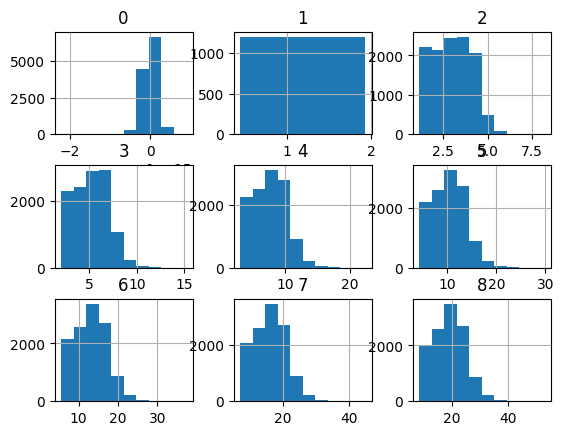

In [31]:
pd.DataFrame(np.log(moments)).hist()

In [34]:
pd.DataFrame(np.log(moments)).describe()

,0,1,2,3,4,5,6,7,8
count,1.196000e+04,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000,11960.000000
mean,-1.610566e-17,1.186857,3.029450,5.235027,7.682644,10.317832,13.108453,16.032672,19.074348
std,2.039905e-16,0.427271,1.068891,1.794380,2.543740,3.303480,4.069308,4.839101,5.611729
min,-2.220446e-15,0.447348,1.152442,2.034951,3.070346,4.235085,5.487742,6.838598,8.279975
25%,-1.110223e-16,0.817701,2.126888,3.754257,5.618805,7.683406,9.922587,12.258507,14.714944
50%,0.000000e+00,1.187933,3.035601,5.250397,7.697142,10.331887,13.119818,16.041584,19.082002
75%,0.000000e+00,1.558317,3.883478,6.576035,9.493710,12.595646,15.854011,19.241408,22.756363
max,8.881784e-16,1.928768,8.207438,15.201174,22.419506,29.820164,37.374973,45.063313,52.869436


In [33]:
moments

[array([1.00000000e+00, 1.59092935e+00, 3.44714516e+00, 9.41607828e+00,
        3.09478809e+01, 1.18668353e+02, 5.19437733e+02, 2.55410809e+03,
        1.39341373e+04]),
 array([1.00000000e+00, 1.66702008e+00, 4.01449395e+00, 1.27877425e+01,
        5.08341099e+01, 2.42412939e+02, 1.34857579e+03, 8.57396061e+03,
        6.13252174e+04]),
 array([1.00000000e+00, 1.65537972e+00, 3.85288707e+00, 1.16413014e+01,
        4.34513603e+01, 1.93590776e+02, 1.00387793e+03, 5.94307840e+03,
        3.95634623e+04]),
 array([1.00000000e+00, 1.61838394e+00, 3.73450282e+00, 1.13428188e+01,
        4.29239169e+01, 1.94761088e+02, 1.03077218e+03, 6.23437492e+03,
        4.24199486e+04]),
 array([1.00000000e+00, 1.65411488e+00, 3.79393141e+00, 1.11420983e+01,
        3.99702665e+01, 1.69695739e+02, 8.33336810e+02, 4.65154961e+03,
        2.91073558e+04]),
 array([1.00000000e+00, 1.65112942e+00, 3.75800990e+00, 1.09105465e+01,
        3.86324819e+01, 1.61874514e+02, 7.85048656e+02, 4.33148499e+03,
      